# lets start with the linear regression again

You know that the formula of a line is
$Y = mx + b$

Lets substitute that for missing weights
$Y = w0x + w1$



tf.Tensor([0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(10,), dtype=float32)
tf.Tensor([ 2.  6. 10. 14. 18. 22. 26. 30. 34. 38.], shape=(10,), dtype=float32)


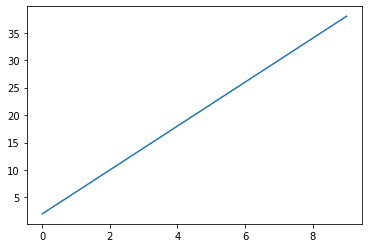

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# lets create data for points in the line using tensors
m = 4
b = 2
X = tf.constant(range(10), dtype=tf.float32)
Y = tf.constant(m*X + b, dtype=tf.float32)

print(X)
print(Y)
plt.plot(X.numpy(), Y.numpy())


# Create a model
First we need to create a model to compare the accuracy of our predictions.
Easy way to start is create a very simple model that will return the mean of the $Y$ array

In [16]:
Y_mean = np.mean(Y.numpy())
print(f'The mean is:{Y_mean}')
def prediction_model(X):
    #returns an array of the same length with all values equals to mean of the real Y
    prediction = Y_mean * len(X)
    return prediction

# Test this model
prediction = prediction_model(X)
print(f'Testing X: {X} in prediction_model {prediction_model(X)}')


The mean is:20.0
Testing X: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] in prediction_model 200.0


# Create a loss Function
We known that the Mean Square Error MSE is
$$\frac{1}{n}\sum_{i}^{n}(\bar{Y_{i}} - Y_{i})^{2}$$

In [17]:
def compute_loss(X, Y, w0,w1):
    Y_hat = w0*X + w1
    error = (Y_hat - Y)**2
    loss = tf.reduce_mean(error)
    return loss



# Create a function that computes the gradient

In [18]:
def compute_gradient(X,Y,w0,w1):
    with tf.GradientTape() as tape:
        loss = compute_loss(X,Y,w0,w1)
    return tape.gradient(loss, [w0,w1])

# Create a Traning Loop

In [20]:
TRAINING_STEPS = 1000 
LEARNING_RATE = 0.02
MSG = "STEP {step} - loss: {loss}, w0: {w0}, w1: {w1}\n"

# Initialize values of w0 and w1
w0 = tf.Variable(0, dtype=tf.float32)
w1 = tf.Variable(0, dtype=tf.float32)

for step in range(0, TRAINING_STEPS + 1):
    dw0, dw1 = compute_gradient(X,Y, w0,w1)
    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    if step % 100 == 0:
        loss = compute_loss(X,Y,w0,w1)
        print(MSG.format(step=step,loss=loss,w0=w0.numpy(),w1=w1.numpy()))



STEP 0 - loss: 15.626337051391602, w0: 4.919998645782471, w1: 0.7999998331069946

STEP 100 - loss: 0.05150383710861206, w0: 4.067259311676025, w1: 1.578243613243103

STEP 200 - loss: 0.005311555694788694, w0: 4.021599769592285, w1: 1.864558219909668

STEP 300 - loss: 0.0005477849626913667, w0: 4.006936550140381, w1: 1.956504225730896

STEP 400 - loss: 5.64910369575955e-05, w0: 4.002227306365967, w1: 1.9860317707061768

STEP 500 - loss: 5.825835160067072e-06, w0: 4.000715255737305, w1: 1.9955145120620728

STEP 600 - loss: 6.006603712194192e-07, w0: 4.000229835510254, w1: 1.9985593557357788

STEP 700 - loss: 6.169471333805632e-08, w0: 4.000073432922363, w1: 1.9995381832122803

STEP 800 - loss: 6.329773594160315e-09, w0: 4.000023365020752, w1: 1.999851942062378

STEP 900 - loss: 6.623172565944913e-10, w0: 4.000007152557373, w1: 1.999952793121338

STEP 1000 - loss: 6.869107366247462e-11, w0: 4.000002384185791, w1: 1.999984860420227



# Create some test data

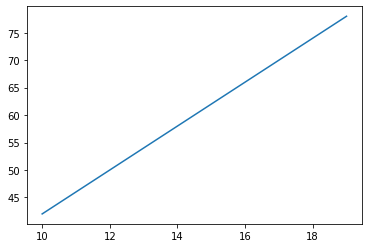

In [21]:
X_test = tf.constant(range(10, 20), dtype=tf.float32)
Y_test = tf.constant(m*X_test + b)
plt.plot(X_test.numpy(), Y_test.numpy())

# Test agains the error function

In [23]:
print(compute_loss(X_test, Y_test, w0, w1))

tf.Tensor(4.2928158e-10, shape=(), dtype=float32)


# Exploring the Operations on datasets: Map, filter, batch, shuffle

In [65]:
def print_datasets(dataset):
    for item in dataset:
        print(item)

ds_from_tensors = tf.data.Dataset.from_tensors([[1,2,3,4,5],[1,2,3,4,5],[1,2,3,4,5]])
print_datasets(ds_from_tensors)

ds_from_tensor_slices = tf.data.Dataset.from_tensor_slices([[1,1,1,1,1],[2,2,2,2,2],[3,3,3,3,3],[4,4,4,4,4]])
print_datasets(ds_from_tensor_slices)

tf.Tensor(
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]], shape=(3, 5), dtype=int32)
tf.Tensor([1 1 1 1 1], shape=(5,), dtype=int32)
tf.Tensor([2 2 2 2 2], shape=(5,), dtype=int32)
tf.Tensor([3 3 3 3 3], shape=(5,), dtype=int32)
tf.Tensor([4 4 4 4 4], shape=(5,), dtype=int32)


# Batchs

In [67]:
batch1 = ds_from_tensor_slices.batch(batch_size=2)
print_datasets(batch1)

tf.Tensor(
[[1 1 1 1 1]
 [2 2 2 2 2]], shape=(2, 5), dtype=int32)
tf.Tensor(
[[3 3 3 3 3]
 [4 4 4 4 4]], shape=(2, 5), dtype=int32)


In [70]:
print_datasets(ds_from_tensors)
batch2 = ds_from_tensors.batch(batch_size=2)
print_datasets(batch2)

tf.Tensor(
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]], shape=(3, 5), dtype=int32)
tf.Tensor(
[[[1 2 3 4 5]
  [1 2 3 4 5]
  [1 2 3 4 5]]], shape=(1, 3, 5), dtype=int32)


# Map

In [75]:
print_datasets(ds_from_tensors)
map1 = ds_from_tensors.map(lambda x: x*2)
print_datasets(map1)

tf.Tensor(
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]], shape=(3, 5), dtype=int32)
tf.Tensor(
[[ 2  4  6  8 10]
 [ 2  4  6  8 10]
 [ 2  4  6  8 10]], shape=(3, 5), dtype=int32)


# Filtering text reviews

In [117]:
import os
def get_review(filepath):
    review = tf.io.read_file(filepath)
    return review

def get_label(filepath):
    label = tf.strings.split(filepath,os.path.sep)[-2]
    return label

def process_into_labels_reviews(filepath):
    label = get_label(filepath)
    review = get_review(filepath)
    return (label, review)



def print_labels_reviews(dataset):
    log = "label: {label}\nreview: {review}"
    for (label, review) in dataset:
        print(log.format(label=label, review= review))

def print_reviews_dataset(dataset):
    log = "{filepath}\n{label}\n{review}"
    for filepath in dataset:        
        label= get_label(filepath)
        review = get_review(filepath)        
        print(log.format(filepath=filepath,label=label, review=review))



reviews_file_pattern = "../../datasets/ex01/reviews/*/*.txt"
ds_text_reviews = tf.data.Dataset.list_files(reviews_file_pattern)
ds_labels_reviews = ds_text_reviews.map(process_into_labels_reviews)
print_labels_reviews(ds_labels_reviews)



label: b'positive'
review: b''
label: b'negative'
review: b''
label: b'negative'
review: b"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't belie

In [132]:
def remove_empty_reviews(label, review):
    return review != ''

ds_filtered = ds_labels_reviews.filter(remove_empty_reviews)
print_labels_reviews(ds_filtered)

label: b'positive'
review: b"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal 

# Everything in a single line

In [139]:
path = "../../datasets/ex01/reviews/*/*.txt"
ds_labels_and_reviews = tf.data.Dataset.list_files(path).map(process_into_labels_reviews).filter(remove_empty_reviews)
print_labels_reviews(ds_labels_and_reviews)

label: b'negative'
review: b"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air.\n"
label: b'positive'
review: b'A wo